In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
print('导入需要包')

导入需要包


In [10]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    # Iris数据集的列名
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, header=None, names=column_names)
print('拿到数据集')

拿到数据集


In [13]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[features].values
print('看看数据集长什么样')
print(df.head())
print(X[:][1])

看看数据集长什么样
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
[4.9 3.  1.4 0.2]


In [14]:
results={}
for i,feature in enumerate(features):
    data = X[:,i]
    mean = np.mean(data)#均值
    median = np.median(data)#中位数
    mode = stats.mode(data).mode#众数
    range_val = np.ptp(data)#极差
    q1 = np.percentile(data,25)#四分数
    q3 = np.percentile(data,25)#四分数
    iqr = q3 - q1 #四分位极差
    results[feature] ={
        '均值': mean,
        '中位数': median,
        '众数': mode,
        '极差': range_val,
        'Q1': q1,
        'Q3': q3,
        '四分位极差': iqr}
results = pd.DataFrame(results).T
print('任务1')
print('每个属性的中心趋势以及散步')
print(results)  

任务1
每个属性的中心趋势以及散步
                     均值   中位数   众数   极差   Q1   Q3  四分位极差
SepalLengthCm  5.843333  5.80  5.0  3.6  5.1  5.1    0.0
SepalWidthCm   3.054000  3.00  3.0  2.4  2.8  2.8    0.0
PetalLengthCm  3.758667  4.35  1.5  5.9  1.6  1.6    0.0
PetalWidthCm   1.198667  1.30  0.2  2.4  0.3  0.3    0.0


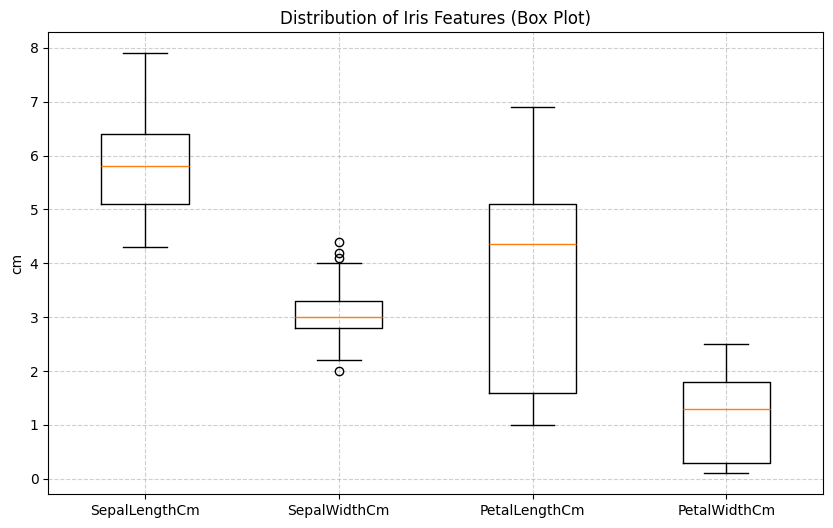

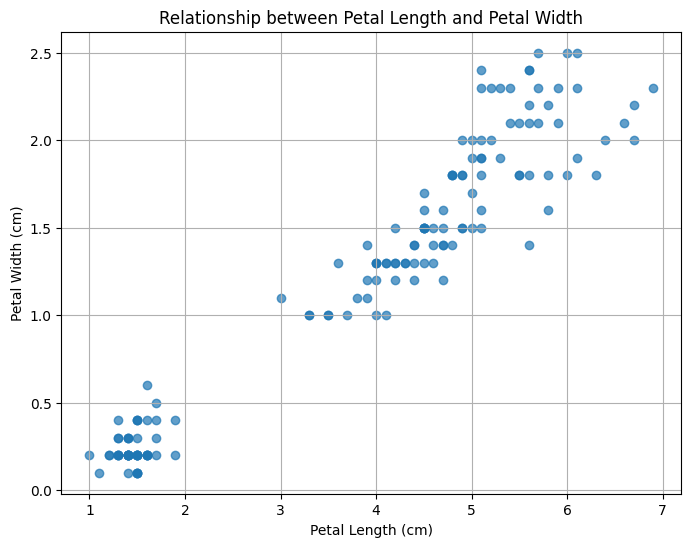

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(X, tick_labels=features)
plt.title('Distribution of Iris Features (Box Plot)')
plt.ylabel('cm')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], alpha=0.7) # X[:, 2]是花瓣长度, X[:, 3]是花瓣宽度
plt.title('Relationship between Petal Length and Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()


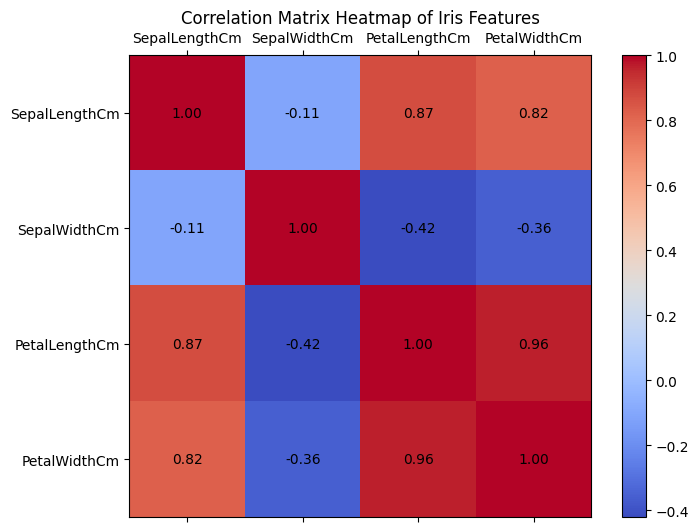

任务3：相关系数矩阵
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


In [7]:
correlation_matrix = df[features].corr()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm') # coolwarm色谱，正相关暖色，负相关冷色
fig.colorbar(cax)

ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features)
ax.set_yticklabels(features)

for i in range(len(features)):
    for j in range(len(features)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black')
ax.set_title('Correlation Matrix Heatmap of Iris Features')
plt.show()
print("任务3：相关系数矩阵")
print(correlation_matrix)

In [15]:
#4和5
np.random.seed(42) 
sample_indices = np.random.choice(len(X), 20, replace=False)
samples = X[sample_indices]


num_samples = len(samples)
distance_matrix_before = np.zeros((num_samples, num_samples))

for i in range(num_samples):
    for j in range(num_samples):
        distance = np.linalg.norm(samples[i] - samples[j])
        distance_matrix_before[i, j] = distance

print(distance_matrix_before[:5, :5])

min_vals = samples.min(axis=0)
max_vals = samples.max(axis=0)
normalized_samples = (samples - min_vals) / (max_vals - min_vals)


distance_matrix_after = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(num_samples):
        distance = np.linalg.norm(normalized_samples[i] - normalized_samples[j])
        distance_matrix_after[i, j] = distance

print(distance_matrix_after[:5, :5])


[[0.         3.31209903 2.94108823 0.38729833 0.73484692]
 [3.31209903 0.         6.03986755 3.19061123 3.60970913]
 [2.94108823 6.03986755 0.         3.06267857 2.463737  ]
 [0.38729833 3.19061123 3.06267857 0.         0.8660254 ]
 [0.73484692 3.60970913 2.463737   0.8660254  0.        ]]
[[0.         0.92951339 0.85109415 0.15800589 0.25854847]
 [0.92951339 0.         1.65130719 0.93521573 1.04448201]
 [0.85109415 1.65130719 0.         0.83348644 0.64801179]
 [0.15800589 0.93521573 0.83348644 0.         0.29144836]
 [0.25854847 1.04448201 0.64801179 0.29144836 0.        ]]
